![Notebooks in Portuguese](https://img.shields.io/badge/Notebooks-Portuguese-yellow?style=flat-square)
![Translate with jupyter-translate](https://img.shields.io/badge/Translate-Jupyter--Translate-blue?style=flat-square)
> ⚠️ **Note:** The notebooks in this repository are written in Portuguese, but the code, functions, and variables are all in English.  
> If you prefer another language, use tools like [jupyter-translate](https://github.com/WittmannF/jupyter-translate) to automatically translate cells inside JupyterLab.  
> See [USAGE.md](./USAGE.md) for function documentation in both Portuguese and English.



# Análise de Precipitação com CHIRPS

Este notebook demonstra como utilizar a função `get_CHIRPS` para extrair dados de precipitação diária ou mensal da coleção CHIRPS para uma região de interesse (ROI). Utilizamos aqui como exemplo a Floresta da Tijuca, no Rio de Janeiro.


In [1]:
import warnings ## <- apenas para deixar a saída mais limpa. Se quiser pode comentar.
warnings.filterwarnings("ignore", category=UserWarning)

import ee
import geemap
import geemap_tools as gee
ee.Authenticate()
ee.Initialize(project='ee-andrebelem') # << note que vc tem que mudar para o seu projeto

In [2]:
# Carrega ROI já preparada
tijuca = gee.file_to_roi("Floresta_da_Tijuca_original.zip").geometry()

In [4]:
# verifique quantos pixels do CHIRPS cabem dentro do ROI
# a resolução espacial do CHIRPS é uma Grade de aproximadamente 0.05° x 0.05° (graus decimais)
# o que equivalente a cerca de 5.3 km x 5.3 km na linha do Equador
gee.analysis.describe_roi(tijuca, pixel_res=[5000], print_summary=True)

📐 Área total: 98.20 km²
📏 Perímetro total: 49.35 km


,Resolução (m),Área de pixel (m²),Nº estimado de pixels
0,5000,25000000,4


{'area_km2': 98.20025473025349,
 'perimetro_km': 49.35211809930279,
 'n_pixels': {'5000m': 4},
 'df':    Resolução (m)  Área de pixel (m²)  Nº estimado de pixels
 0           5000            25000000                      4}


## Extração dos dados CHIRPS

A função `get_CHIRPS` permite extrair precipitação diária ou mensal. Aqui, vamos usar a opção mensal entre 2020 e 2023.


In [3]:

df_chirps = gee.analysis.get_CHIRPS(tijuca, start="2020-01-01", end="2023-12-31", frequency="monthly", debug=True)
df_chirps.head()


Processando CHIRPS mensal: 100%|███████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.96s/it]

[DEBUG] Linhas retornadas: 48
[DEBUG] Colunas: ['pr_max', 'pr_mean', 'pr_median', 'pr_min', 'pr_stdDev']
[DEBUG] Período: 2020-01-01 00:00:00 a 2023-12-01 00:00:00


,pr_max,pr_mean,pr_median,pr_min,pr_stdDev
date,,,,,
2020-01-01,138.646760,114.814877,114.540175,77.439577,17.632166
2020-02-01,292.180151,256.350301,253.112138,144.366153,48.099518
2020-03-01,181.015472,153.214764,151.742008,70.315218,33.737720
2020-04-01,51.122679,40.892346,39.652071,15.515325,10.320591
2020-05-01,175.969767,126.005637,118.347912,52.002639,36.903808



## Visualização da precipitação mensal

Abaixo, um gráfico da precipitação mensal média e mediana, com faixa de ±1 desvio padrão em cinza.


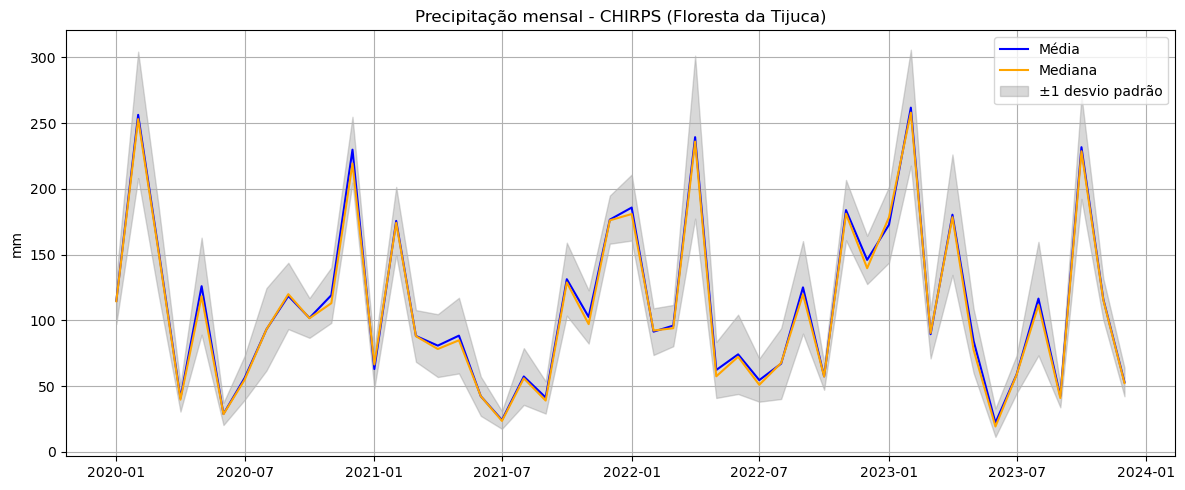

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_chirps.index, df_chirps['pr_mean'], label="Média", color="blue")
plt.plot(df_chirps.index, df_chirps['pr_median'], label="Mediana", color="orange")
plt.fill_between(df_chirps.index,
                 df_chirps['pr_mean'] - df_chirps['pr_stdDev'],
                 df_chirps['pr_mean'] + df_chirps['pr_stdDev'],
                 alpha=0.3, color="gray", label="±1 desvio padrão")
plt.title("Precipitação mensal - CHIRPS (Floresta da Tijuca)")
plt.ylabel("mm")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Daily data
Também é possível extrair os dados diários, mas *cautela* com o tamanho da saída.
    

In [5]:
df_chirps_daily = gee.analysis.get_CHIRPS(tijuca, start="2020-01-01", end="2023-12-31", frequency="daily", debug=True)
df_chirps_daily.head()

[DEBUG] Linhas retornadas: 1460
[DEBUG] Colunas: ['pr_max', 'pr_mean', 'pr_median', 'pr_min', 'pr_stdDev']
[DEBUG] Período: 2020-01-01 00:00:00 a 2023-12-30 00:00:00


,pr_max,pr_mean,pr_median,pr_min,pr_stdDev
date,,,,,
2020-01-01,0.000000,0.000000,0.000000,0.0,0.000000
2020-01-02,39.292377,26.188649,26.739977,0.0,13.854555
2020-01-03,0.000000,0.000000,0.000000,0.0,0.000000
2020-01-04,0.000000,0.000000,0.000000,0.0,0.000000
2020-01-05,0.000000,0.000000,0.000000,0.0,0.000000


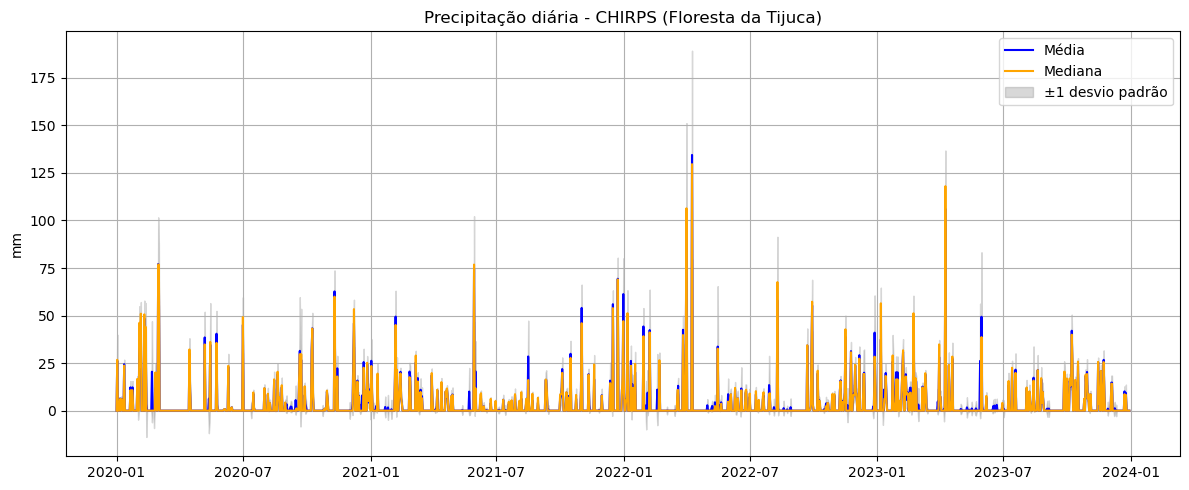

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_chirps_daily.index, df_chirps_daily['pr_mean'], label="Média", color="blue")
plt.plot(df_chirps_daily.index, df_chirps_daily['pr_median'], label="Mediana", color="orange")
plt.fill_between(df_chirps_daily.index,
                 df_chirps_daily['pr_mean'] - df_chirps_daily['pr_stdDev'],
                 df_chirps_daily['pr_mean'] + df_chirps_daily['pr_stdDev'],
                 alpha=0.3, color="gray", label="±1 desvio padrão")
plt.title("Precipitação diária - CHIRPS (Floresta da Tijuca)")
plt.ylabel("mm")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()